<a href="https://colab.research.google.com/github/PadmaJyothi-U/Deep-Learning/blob/main/Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment-12**

**Long Short Term Memory** networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. Introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [ ]:
prices_dataset =  pd.read_csv('prices.csv',header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
369277,2013-02-14,VMC,55.459999,54.869999,52.790001,55.500000,1673800.0
369278,2013-02-14,VNO,85.209995,85.040005,84.609993,85.280005,767300.0
369279,2013-02-14,VRSK,54.470001,54.270000,54.259998,54.549999,406300.0
369280,2013-02-14,VRSN,45.560001,45.669998,45.380001,45.810001,1776000.0


In [ ]:
yahoo = prices_dataset[prices_dataset['symbol']=='YHOO']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(784, 1)
yahoo_stock_prices.shape

(784, 1)

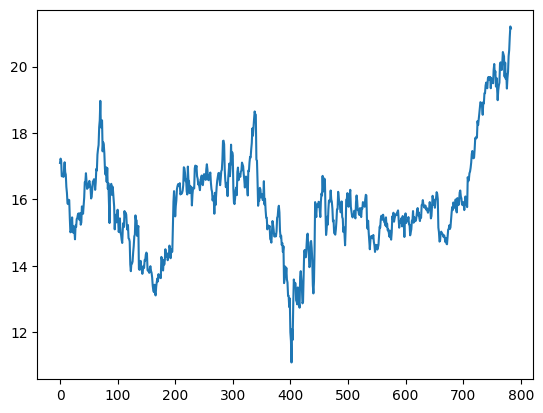

In [ ]:
plt.plot(yahoo_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [ ]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
print(len(train), len(test))

627 157


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.018996000289916992


In [ ]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=10,
    validation_split=0.05)

Epoch 1/10
5/5 [==============================] - 7s 269ms/step - loss: 0.1850 - val_loss: 0.1309
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1436 - val_loss: 0.0983
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1100 - val_loss: 0.0698
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0800 - val_loss: 0.0447
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0539 - val_loss: 0.0249
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0339 - val_loss: 0.0114
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0201 - val_loss: 0.0040
Epoch 8/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0123 - val_loss: 8.7458e-04
Epoch 9/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0095 - val_loss: 3.1441e-04
Epoch 10/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0085 - val_loss: 4.1392e-04


## work in progress

1/1 [==============================] - 1s 834ms/step
[[0.43460876]]
1/1 [==============================] - 1s 836ms/step
[[0.87638855]]
1/1 [==============================] - 0s 28ms/step
[[1.4228654]]
1/1 [==============================] - 0s 25ms/step
[[2.09786]]
1/1 [==============================] - 0s 25ms/step
[[2.8798258]]
1/1 [==============================] - 0s 25ms/step
[[15.48824 ]
 [19.959051]
 [25.489397]
 [32.320343]
 [40.233833]]


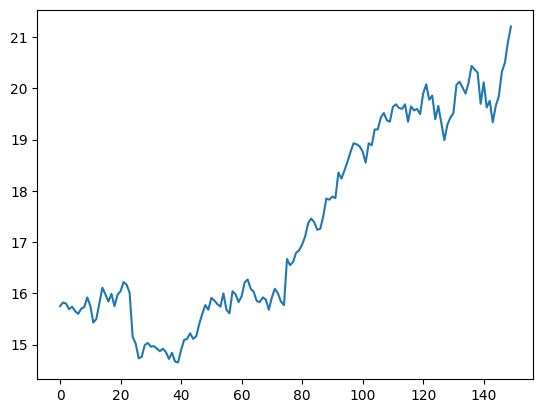

In [ ]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)



---